In [5]:
! explorer .

In [ ]:
Xsec_point.xlsx

### 全般

vsp.SetParmVal(fuse_id,<span class="mark">"Length","Design"</span>,fuselage_length)

上記の黄色の部分を調べるには、
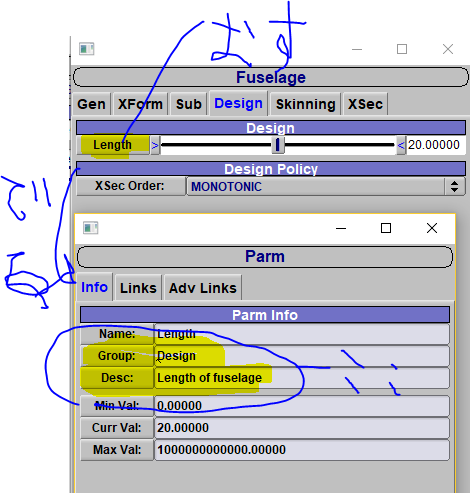

## 断面を作る

### 断面ファイルのサンプル
https://github.com/OpenVSP/OpenVSP のTestXSec.fxs

In [ ]:
OPENVSP_XSEC_FILE_V1
1.0  0.0
0.0  -1.0
-1.0   0.0
0.0   1.0
1.0  0.0

**注意**
1. X軸上のプラスの点から始めること
1. 時計回り
1. クローズするように点作成
1. 点間距離が細かすぎると、エラーを起こす

## GUI 断面ファイルの読み込み
動画参照

## python API

おまじない

In [1]:
"""Test the OpenVSP Python Interface."""
%matplotlib inline
from __future__ import print_function

import vsp as vsp
import numpy as np
import pandas as pd

def angle_between(refvec):#角度を計算
    origin=[0,0]
    ang1 = np.arctan2(*origin[::-1])
    ang2 = np.arctan2(*refvec[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

def create_point_random(start_and_end_point):#ランダムでポイントを作成
    point = np.random.randn(5,2)
    point = np.insert(point,0,start_and_end_point,axis=0)
    pnt=point.tolist()
    pnt = sorted(pnt, key=angle_between)
    pnt.append(start_and_end_point)
    return pnt

stdout = vsp.cvar.cstdout
errorMgr = vsp.ErrorMgrSingleton_getInstance()

fuselage設定

In [2]:
fuselage_length = 20
Xsec_num = 10

input 断面

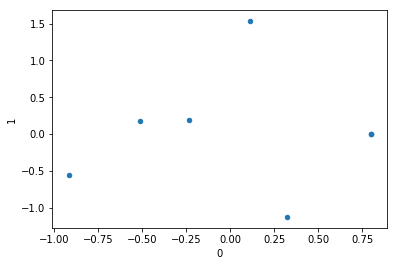

In [3]:
start_and_end_point = [0.8,0]
X_sec_XLocation = 5
taisho_Xsec = 1
pnt = create_point_random(start_and_end_point)
df = pd.DataFrame(pnt)
df.plot(kind='scatter', x=0, y=1)

中身

In [8]:

vsp.VSPRenew()
errorMgr.PopErrorAndPrint(stdout)

geoms = vsp.FindGeoms()

# Add Fuse
fuse_id = vsp.AddGeom("FUSELAGE")
vsp.SetParmVal(fuse_id,"Length","Design",fuselage_length)
Xsec = "XSec_" + str(taisho_Xsec)
vsp.SetParmVal(fuse_id,"XLocPercent",Xsec,X_sec_XLocation)
# Get XSec Surf ID
xsurf_id = vsp.GetXSecSurf(fuse_id, 0)

# Change Type of First XSec
vsp.ChangeXSecShape(xsurf_id, 0, vsp.XS_SUPER_ELLIPSE)
errorMgr.PopErrorAndPrint(stdout)

set_Xsec_No = 3
vsp.ChangeXSecShape(xsurf_id, set_Xsec_No, vsp.XS_FILE_FUSE)
file_xsec_id = vsp.GetXSec(xsurf_id, set_Xsec_No)

# Build Point Vec
pnt_vec = vsp.Vec3dVec() 
for vec in pnt:
    pnt_vec.push_back(vsp.vec3d(vec[0], vec[1], 0.0)) 

# Load Points Into XSec
vsp.SetXSecPnts(file_xsec_id, pnt_vec)

最後のおまじない

In [9]:
geoms = vsp.FindGeoms()

print("End of second use case, all geoms in Vehicle.")
print(geoms)

vsp.WriteVSPFile("apitest2.vsp3")

# Check for errors

num_err = errorMgr.GetNumTotalErrors()
for i in range(0, num_err):
    err = errorMgr.PopLastError()
    print("error = ", err.m_ErrorString)

End of second use case, all geoms in Vehicle.
('CGSBSLHPXT',)


これで "apitest2.vsp3"が出来上がって、Fuselageができあがる

## working

- 複数の断面をdfに入れる
- 各々の断面を表示
- 断面のスパンを設定
- vspファイルを作成